In [1]:
# basic_env kernel
from Bio import AlignIO
import matplotlib.pyplot as plt

from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import rich
from rich_msa import RichAlignment

import logomaker
import pandas as pd

#Import modules
import gzip, logomaker, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, protfasta
import seaborn as sns
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
import matplotlib 
import matplotlib.pyplot as plt
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

# Full sequence alignment

In [3]:
def read_fasta(file):

    with open(file, "r") as f:
        lines = f.readlines()

    seq = ""
    seqs = []
    names = []

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">", ""))
            if len(names) > 1:
                seqs.append(seq.replace("*", ""))
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq.replace("*", ""))
    return pd.DataFrame({"name" : names, "aa_seq" : seqs})

In [4]:
# Read in one gene per species
unique_species_df = read_fasta("../data/fasta_files/longest_gene_per_species.fasta")

# Get species names
name_key = pd.read_csv("../data/phylogenetic_info/top138_phyloinfo.csv")
unique_species_df = unique_species_df.merge(name_key, on='name')
unique_species_df

name  \
0    Sordariomycetes_jgi|Acral2|2047914|estExt_Gene...   
1    Pezizomycetes_jgi|Ascni1|352744|fgenesh1_pg.76...   
2           Xylonomycetes_jgi|Trigu1|1079454|gm1.247_g   
3            Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g   
4    Sordariomycetes_jgi|Daces1|522128|fgenesh1_pg....   
..                                                 ...   
119             Mory_EHA48851.1_MagnaportheOryzae70_15   
120       Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g   
121          Afla_EED46972.1_AspergillusFlavusNRRL3357   
122                                   Tdel_TDEL0H02940   
123                                  Zyro_ZYRO0D09174g   

                                                aa_seq     id TreeLeaf  \
0    MADTCGGSTPLKNFSQYGSQDRSLQQDRVVHGFHGSAAAGPSTFRS...    NaN   Acral2   
1    MSDSRHMRRPSHASDTDDEDDQSSTLHRTTSNNPYSISPSSPHRGN...    NaN   Ascni1   
2    MADALCGPSNPLQNLQKHTSVDRTLQQDRLVGPRHSPVQDFRSRSS...  136.0   Trigu1   
3    MTDALCGPSNPLQHLQKHTSVDRTLQQDRLVGPRHSPVQDFRSQSQ...  137.0   Xylhe1   
4    MILSLTLCLTFFGLTFVIAAPEDAETLANLEVYTSLRRCAKDCFWG...    NaN   Daces1   
..                                                 ...    ...      ...   
119  MNNTSDLGLDDFTAFGGGASAFPSPAMPGVFDIASTTASTMGTVSP...   69.0   Magor1   
120  MLLGESVFSAFAEPPSAKPVDLEDLLLDTRGSHLDDHNADQALRSN...   91.0   Hanpo2   
121  MLSPHQMTAGVMAGPDSLADLPSGTISPKDLFMDASAPPSASFTDL...    NaN   Aspfl1   
122  MSVFMNQNITCTAETDTEPFFGSLDAFVKKEDDGQVPMDLLVHHDD...  132.0   Torde1   
123  MSVQSLFENKLDSPVPGCLGAEIADSFFLEDEQAMFELDPPQHQET...  138.0   Zygro1   

    Validated                   SpeciesName  NCBI Taxon  \
0         Yes     Sodiomycetes alcalophilus         NaN   
1         Yes          Ascodesmis nigricans         NaN   
2         Yes        Trinosporium guianense   1196434.0   
3         Yes                 Xylona heveae   1217826.0   
4         Yes  Dactylonectria estremocensis         NaN   
..        ...                           ...         ...   
119       Yes            Pyricularia oryzae    318829.0   
120       Yes            Ogataea polymorpha    460523.0   
121       Yes            Aspergillus flavus         NaN   
122       Yes       Torulaspora delbrueckii      4950.0   
123       Yes      Zygosaccharomyces rouxii      4956.0   

                                 Note  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
..                                ...   
119  Equivalent to magnaporthe oryzae   
120                               NaN   
121                               NaN   
122                               NaN   
123                               NaN   

                                                AD_seq  \
0                                                  NaN   
1                                                  NaN   
2    FRDPLASAPPSAAFTNLTSPSIFDSPDVAESFETSPLFANADHDLA...   
3    LRDPLASAPPSAAFTNLTSPSIFDSPDVAESFETSPLFANADADLA...   
4                                                  NaN   
..                                                 ...   
119  SDNFMSAPNSTALTTLTSPSLYNGSPDFGDSYDVSPNFVGNDLESA...   
120  DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...   
121                                                NaN   
122  FFGSLDAFVKKEDDGQVPMDLLVHHDDHDGLTPMFDSDPALSAVSG...   
123  MSVQSLFENKLDSPVPGCLGAEIADSFFLEDEQAMFELDPPQHQET...   

                                         full_sequence  
0                                                  NaN  
1                                                  NaN  
2    MADALCGPSNPLQNLQKHTSVDRTLQQDRLVGPRHSPVQDFRSRSS...  
3    MTDALCGPSNPLQHLQKHTSVDRTLQQDRLVGPRHSPVQDFRSQSQ...  
4                                                  NaN  
..                                                 ...  
119  MNNTSDLGLDDFTAFGGGASAFPSPAMPGVFDIASTTASTMGTVSP...  
120  MLLGESVFSAFAEPPSAKPVDLEDLLLDTRGSHLDDHNADQALRSN...  
121                                                N

In [5]:
# Find cerevisiae in alignment --> 811 - 968 (one indexed)

# AD Sequence
unique_species_df[unique_species_df["SpeciesName"] == "Saccharomyces cerevisiae"]["aa_seq"].values[0][99:140]

# DBD sequence --> 1234 - 1302 (one indexed)
unique_species_df[unique_species_df["SpeciesName"] == "Saccharomyces cerevisiae"]["aa_seq"].values[0][224:279]

'SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVG'

In [6]:
! mafft --auto ../data/fasta_files/longest_gene_per_species.fasta > ../data/fasta_files/longest_gene_per_species_mafft.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8176 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 124
done.

Constructing a UPGMA tree (efffree=0) ... 
  120 / 124
done.

Progressive alignment 1/2... 
STEP   123 / 123 
done.

Making a distance matrix from msa.. 
  100 / 124
done.

Constructing a UPGMA tree (efffree=1) ... 
  120 / 124
done.

Progressive alignment 2/2... 
STEP   113 / 123 
Reallocating..done. *alloclen = 6910
STEP   123 / 123 
done.

disttbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)

distout=h
rescale = 1
dndpre (aa) Version 7.526
alg=X, model=BLOSUM62, 1.53, +0.12, -0.00, noshift, amax=0.0
0 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 2
sueff_global = 0.100000
nadd = 2
rescale = 1

  120 / 124
Segment   1/  2    1-3110
Segment   2/  2 3129-5025.    rejected. identic

In [7]:
# Read in alignment file, saving the sequences
with open("../data/fasta_files/longest_gene_per_species_mafft.fasta", "r") as f:
    lines = f.readlines()

names = []
seqs = []
seq = ""

for line in lines:
    if line.startswith(">"):
        names.append(line.strip().replace(">",""))
        if len(seq) > 0:
            seqs.append(seq)
            seq = ""
    else:
        seq += line.strip()

seqs.append(seq)

amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L']

# Each sequence position gets a dictionary in the list, dictionary counts types of aas at the position
amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

aa_counts = np.zeros((len(seqs[0]), 20))

# Iterate through every sequence and count aas, add to position dictionary
for seq in seqs: 
    # i is position, aa in amino acid
    for i, aa in enumerate(seq): 
        if aa != "-":
            aa_counts[i][amino_acids.index(aa)] += 1


In [8]:
# Need to find this sequence in alignment: 
# AKTVLPIPELDDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDD


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


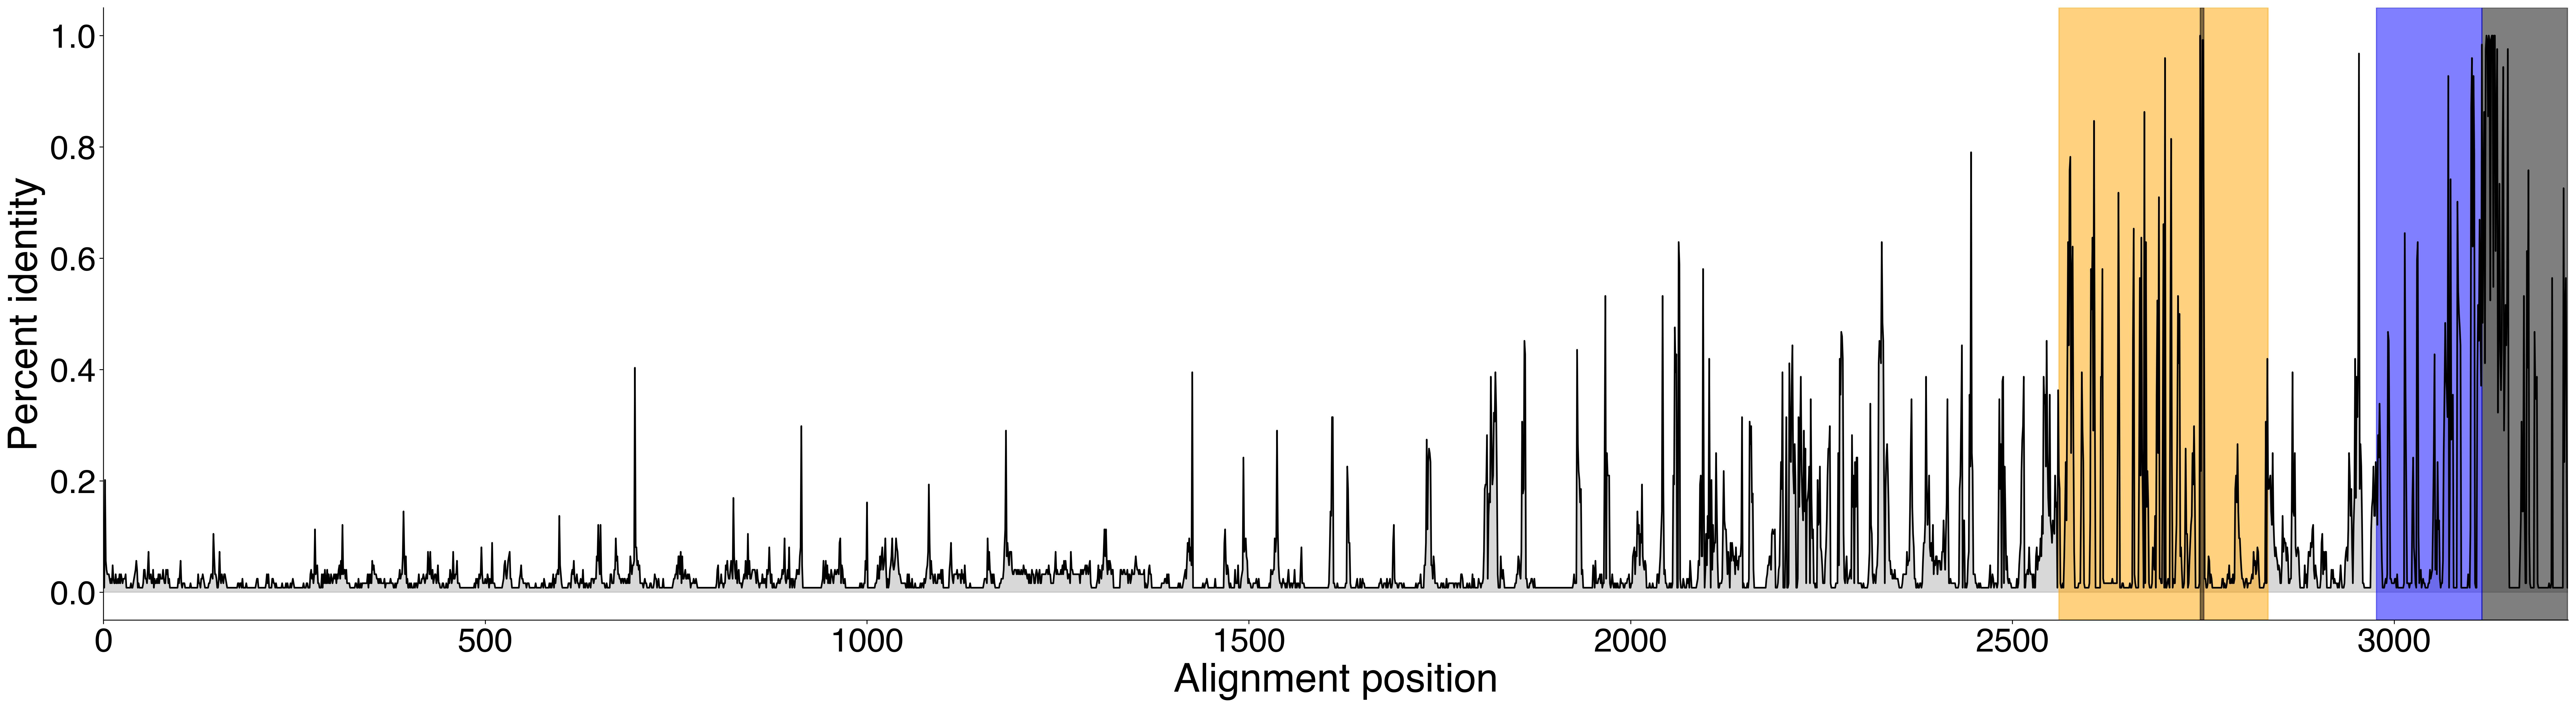

In [9]:
fig, ax = plt.subplots(1,1,figsize=(40,10))
plt.plot(aa_counts.max(axis=1)/len(seqs), color='black')

plt.fill_between(range(0,len(aa_counts)), aa_counts.max(axis=1)/len(seqs), alpha=0.3, color='grey') 

# Location of CAD --> Adding
# DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK
# plt.hlines(1.1, 2581, 2841, linewidth=10, color="orange")
# plt.axvspan(2581, 2841, color="orange", alpha=0.5)
plt.axvspan(2561, 2835, color="orange", alpha=0.5)

sns.set_palette("pastel") 
# Location of DBD --> Adding
# SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVG
# plt.hlines(1.1, 3115, 3227, linewidth=10, color="black")
plt.axvspan(3115, 3227, color="black", alpha=0.5)

# Upstream DBD regions
plt.axvspan(2977, 3115, color="blue", alpha=0.5)

# WLF motif
plt.axvspan(2746, 2751, color="black", alpha=0.5)

plt.xlabel('Alignment position', fontsize=36)
plt.ylabel('Percent identity', fontsize=36)
plt.xlim(0, 3228)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

sns.despine()

plt.savefig("../figures/alignment_conservation_full_longest_species.pdf",format='pdf', bbox_inches='tight')

In [10]:
# This gives number of aa's in each seq

aa_counts.max(axis=1)

array([ 1.,  1., 25., ...,  1.,  1.,  2.], shape=(5026,))

In [77]:
# Read in alignment file, saving the sequences
with open("../Final_submission_materials/Table_S2_500YeastGcn4Alignment.txt", "r") as f:
    lines = f.readlines()

names = []
seqs = []
seq = ""

for line in lines:
    if line.startswith(">"):
        names.append(line.strip().replace(">",""))
        if len(seq) > 0:
            seqs.append(seq)
            seq = ""
    else:
        seq += line.strip()

seqs.append(seq)

amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L']

# Each sequence position gets a dictionary in the list, dictionary counts types of aas at the position
amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

aa_counts_full = np.zeros((len(seqs[0]), 20))

# Iterate through every sequence and count aas, add to position dictionary
for seq in seqs: 
    # i is position, aa in amino acid
    for i, aa in enumerate(seq): 
        if aa != "-":
            aa_counts_full[i][amino_acids.index(aa)] += 1


In [12]:
aa_counts_full

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(2690, 20))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


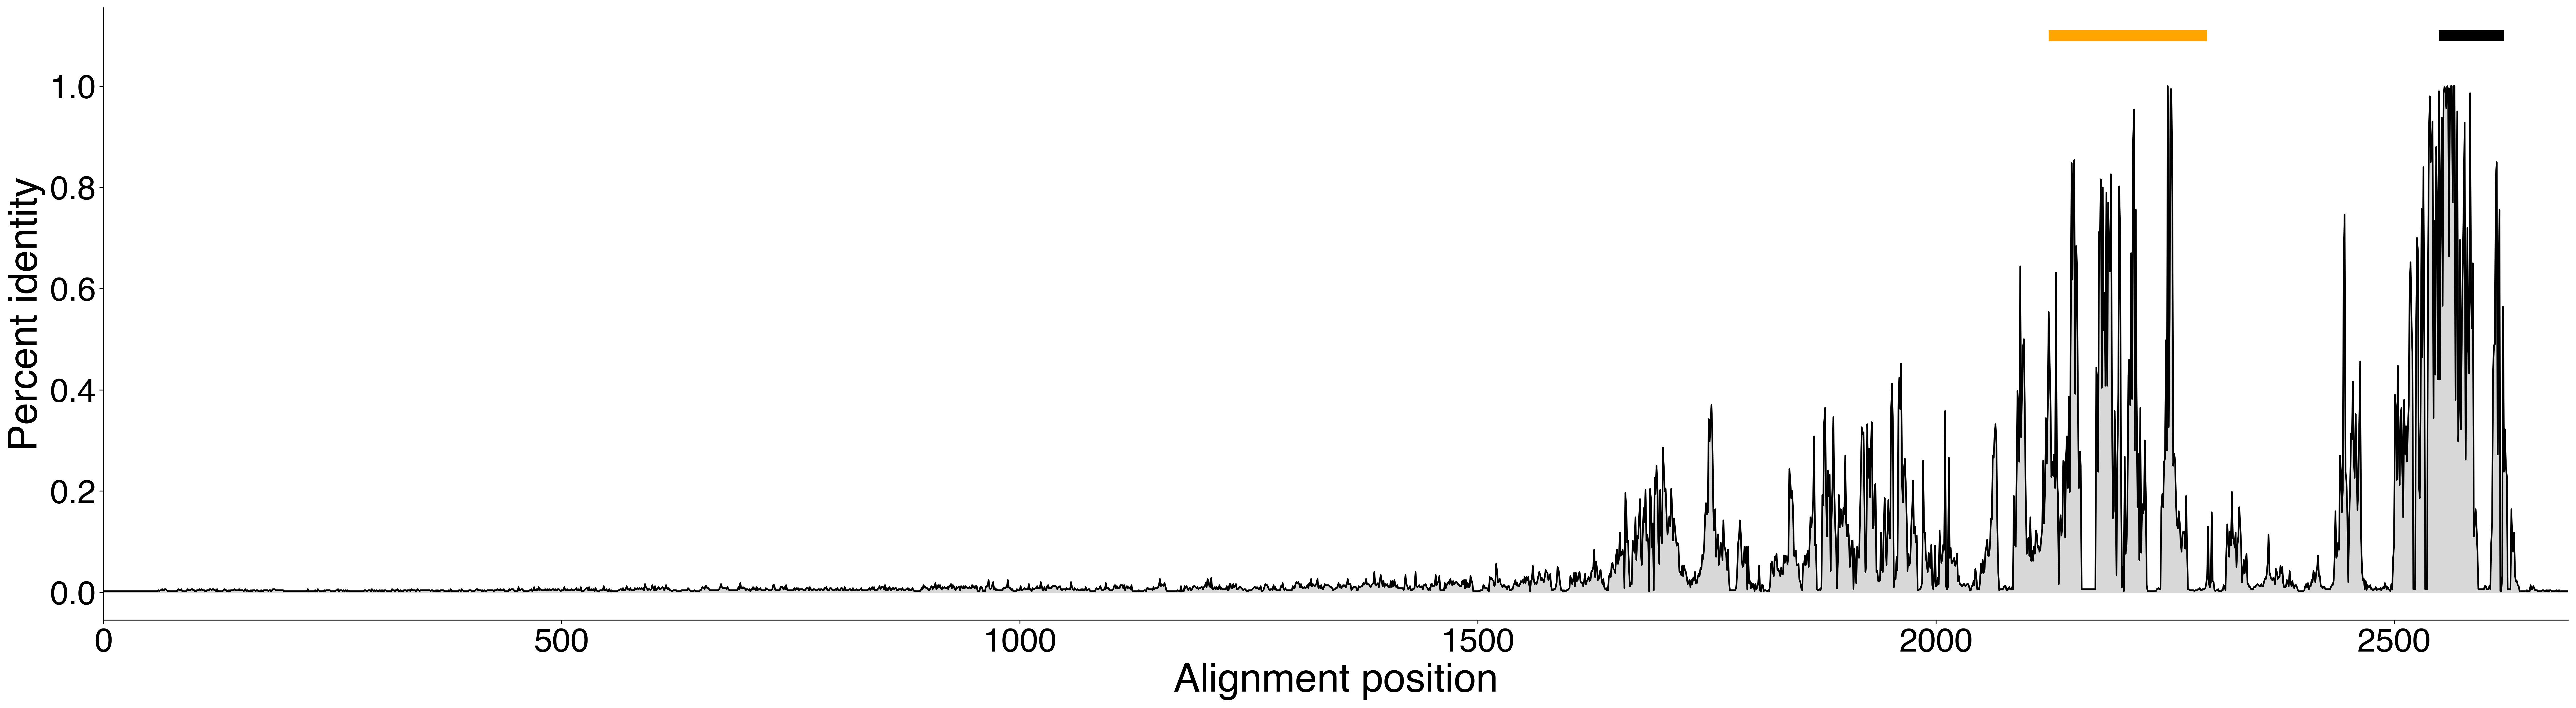

In [13]:
fig, ax = plt.subplots(1,1,figsize=(40,10))
plt.plot(aa_counts_full.max(axis=1)/len(seqs), color='black')

plt.fill_between(range(0,len(aa_counts_full)), aa_counts_full.max(axis=1)/len(seqs), alpha=0.3, color='grey') 

# # Location of CAD --> Adding
# # DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK
plt.hlines(1.1, 2123, 2296, linewidth=10, color="orange")

# # Location of DBD --> Adding
# # SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVG
plt.hlines(1.1, 2549, 2620, linewidth=10, color="black")

plt.xlabel('Alignment position', fontsize=36)
plt.ylabel('Percent identity', fontsize=36)
plt.xlim(0, len(aa_counts_full[:, 0]))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

sns.despine()

plt.savefig("../figures/alignment_conservation_full_all_seqs.pdf",format='pdf', bbox_inches='tight')

# Sliding alignment

In [ ]:
amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L']

# Each sequence position gets a dictionary in the list, dictionary counts types of aas at the position
amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

aa_counts_no_gaps = np.zeros((len(seqs[0]), 20))
seqs_no_gaps = np.zeros(len(seqs[0]))
# Iterate through every sequence and count aas, add to position dictionary
for seq in seqs: 
    # i is position, aa in amino acid
    for i, aa in enumerate(seq): 
        if aa != "-":
            aa_counts_no_gaps[i][amino_acids.index(aa)] += 1
            seqs_no_gaps[i] += 1

(array([585.,  10.,   5.,   8.,   3.,   0.,   1.,   1.,   0.,   1.]),
 array([  1. ,  50.6, 100.2, 149.8, 199.4, 249. , 298.6, 348.2, 397.8,
        447.4, 497. ]),
 <BarContainer object of 10 artists>)

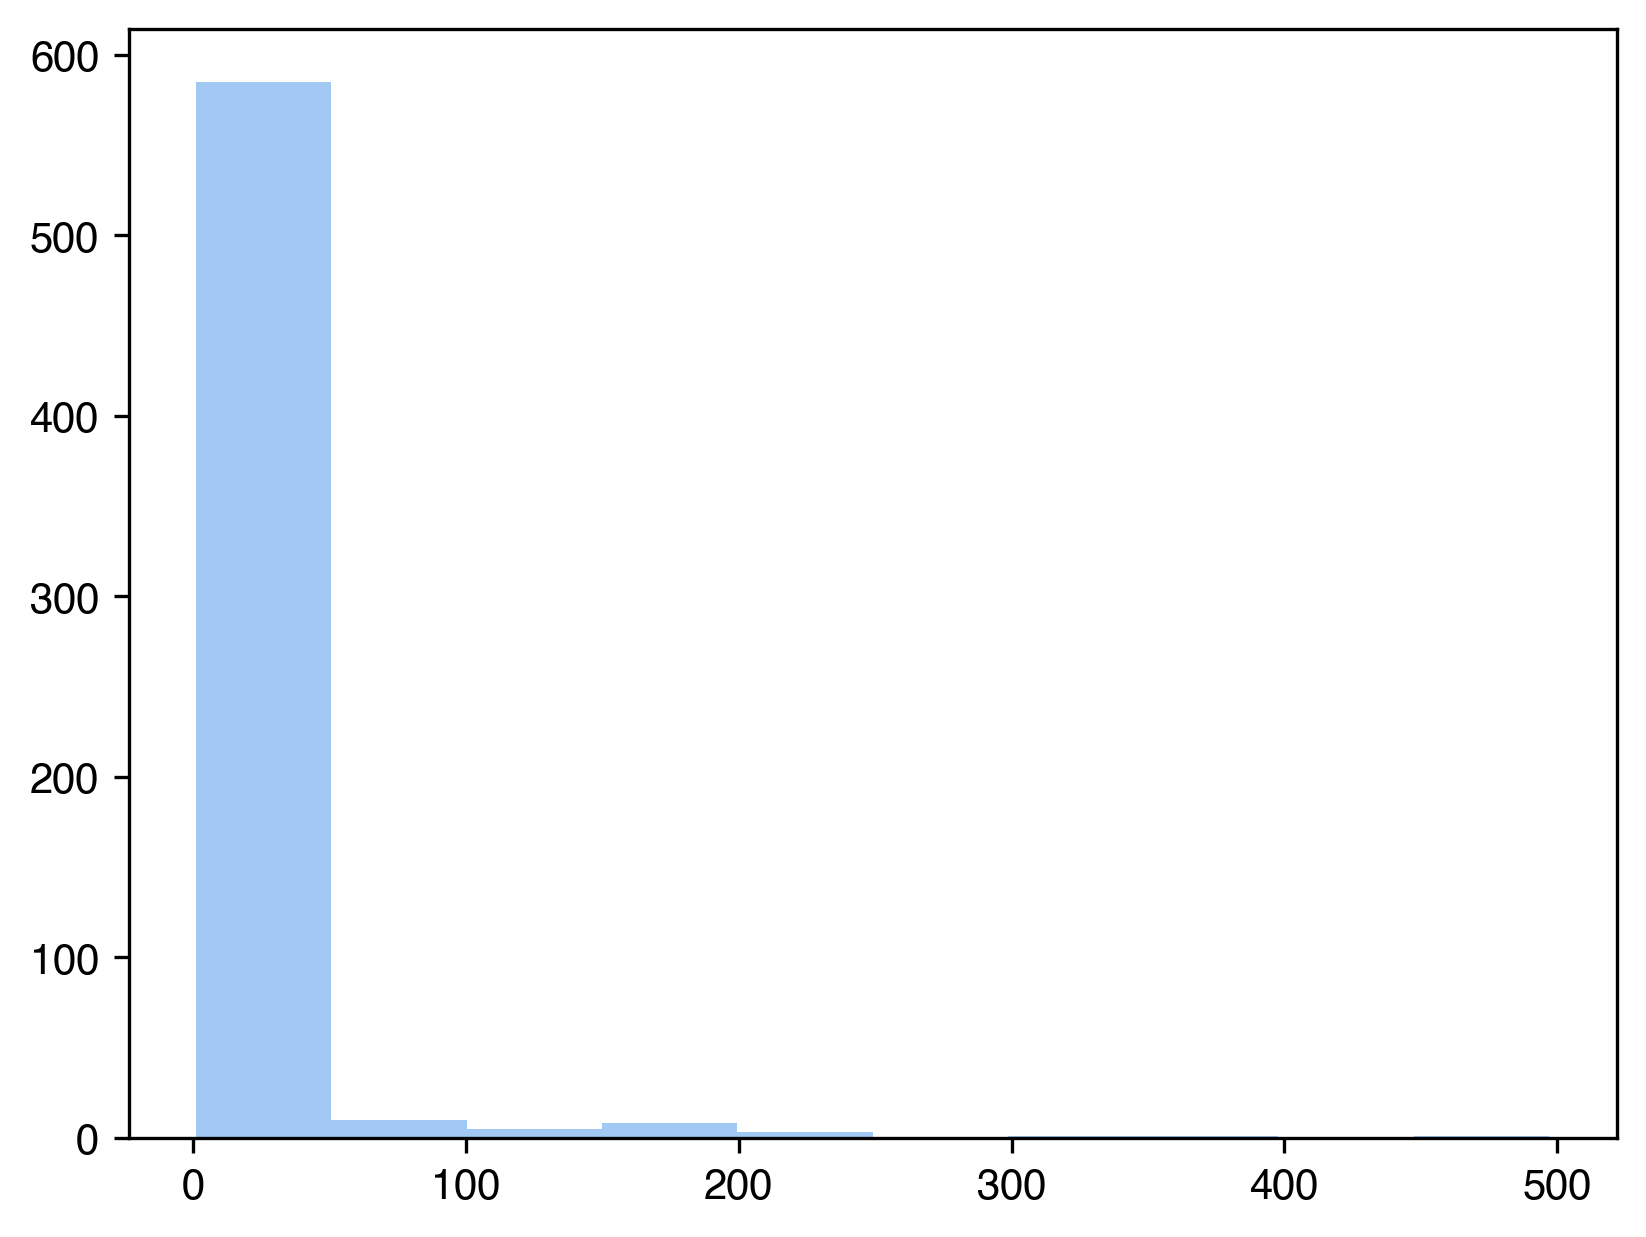

In [85]:
F_counts = []
for aa_count in aa_counts_no_gaps:
    F_counts.append(aa_count[amino_acids.index('F')])

plt.hist(np.array(F_counts)[np.array(F_counts) > 0])

In [15]:
aa_counts_no_gaps.max(axis=1) 

array([1., 1., 1., ..., 1., 1., 1.], shape=(2690,))

In [17]:
gap_pen = (seqs_no_gaps - 1) / len(seqs)

In [27]:
aa_counts_filtered = np.array([aa_counts for aa_counts, gap in zip(aa_counts_no_gaps, seqs_no_gaps) ]) #if gap > 1])
gap_filtered = np.array([gap for aa_counts, gap in zip(aa_counts_no_gaps, seqs_no_gaps)])# if gap > 1])
gap_pen = gap_filtered / len(seqs)

In [28]:
aa_conservation_no_gaps = aa_counts_filtered.max(axis=1) * gap_pen / gap_filtered

mean_vals = [aa_conservation_no_gaps[i:i+50].mean() for i in range(0, len(aa_conservation_no_gaps), 1)]

In [29]:
aa_conservation_no_gaps

array([0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002], shape=(2690,))

In [55]:
import re
for seq in seqs:
    if "SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVG" in seq.replace('-', ''):
        print(re.search("S-*D-*P-*A-*A-*L-*K-*R-*A-*R-*N-*T-*E-*A-*A-*R-*R-*S-*R-*A-*R-*K-*L-*Q-*R-*M-*K-*Q-*L-*E-*D-*K-*V-*E-*E-*L-*L-*S-*K-*N-*Y-*H-*L-*E-*N-*E-*V-*A-*R-*L-*K-*K-*L-*V-*G", seq))
        print(seq)

<re.Match object; span=(2548, 2620), match='SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLE----->
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
import re
for seq in seqs:
    if "DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK" in seq.replace('-', ''):
        print(re.search("D-*D-*A-*V-*V-*E-*S-*F-*F-*S-*S-*S-*T-*D-*S-*T-*P-*M-*F-*E-*Y-*E-*N-*L-*E-*D-*N-*S-*K-*E-*W-*T-*S-*L-*F-*D-*N-*D-*I-*P-*V-*T-*T-*D-*D-*V-*S-*L-*A-*D-*K", seq))
        print(seq)

<re.Match object; span=(2122, 2296), match='DDAV-------------------------VESFFS-------------->
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

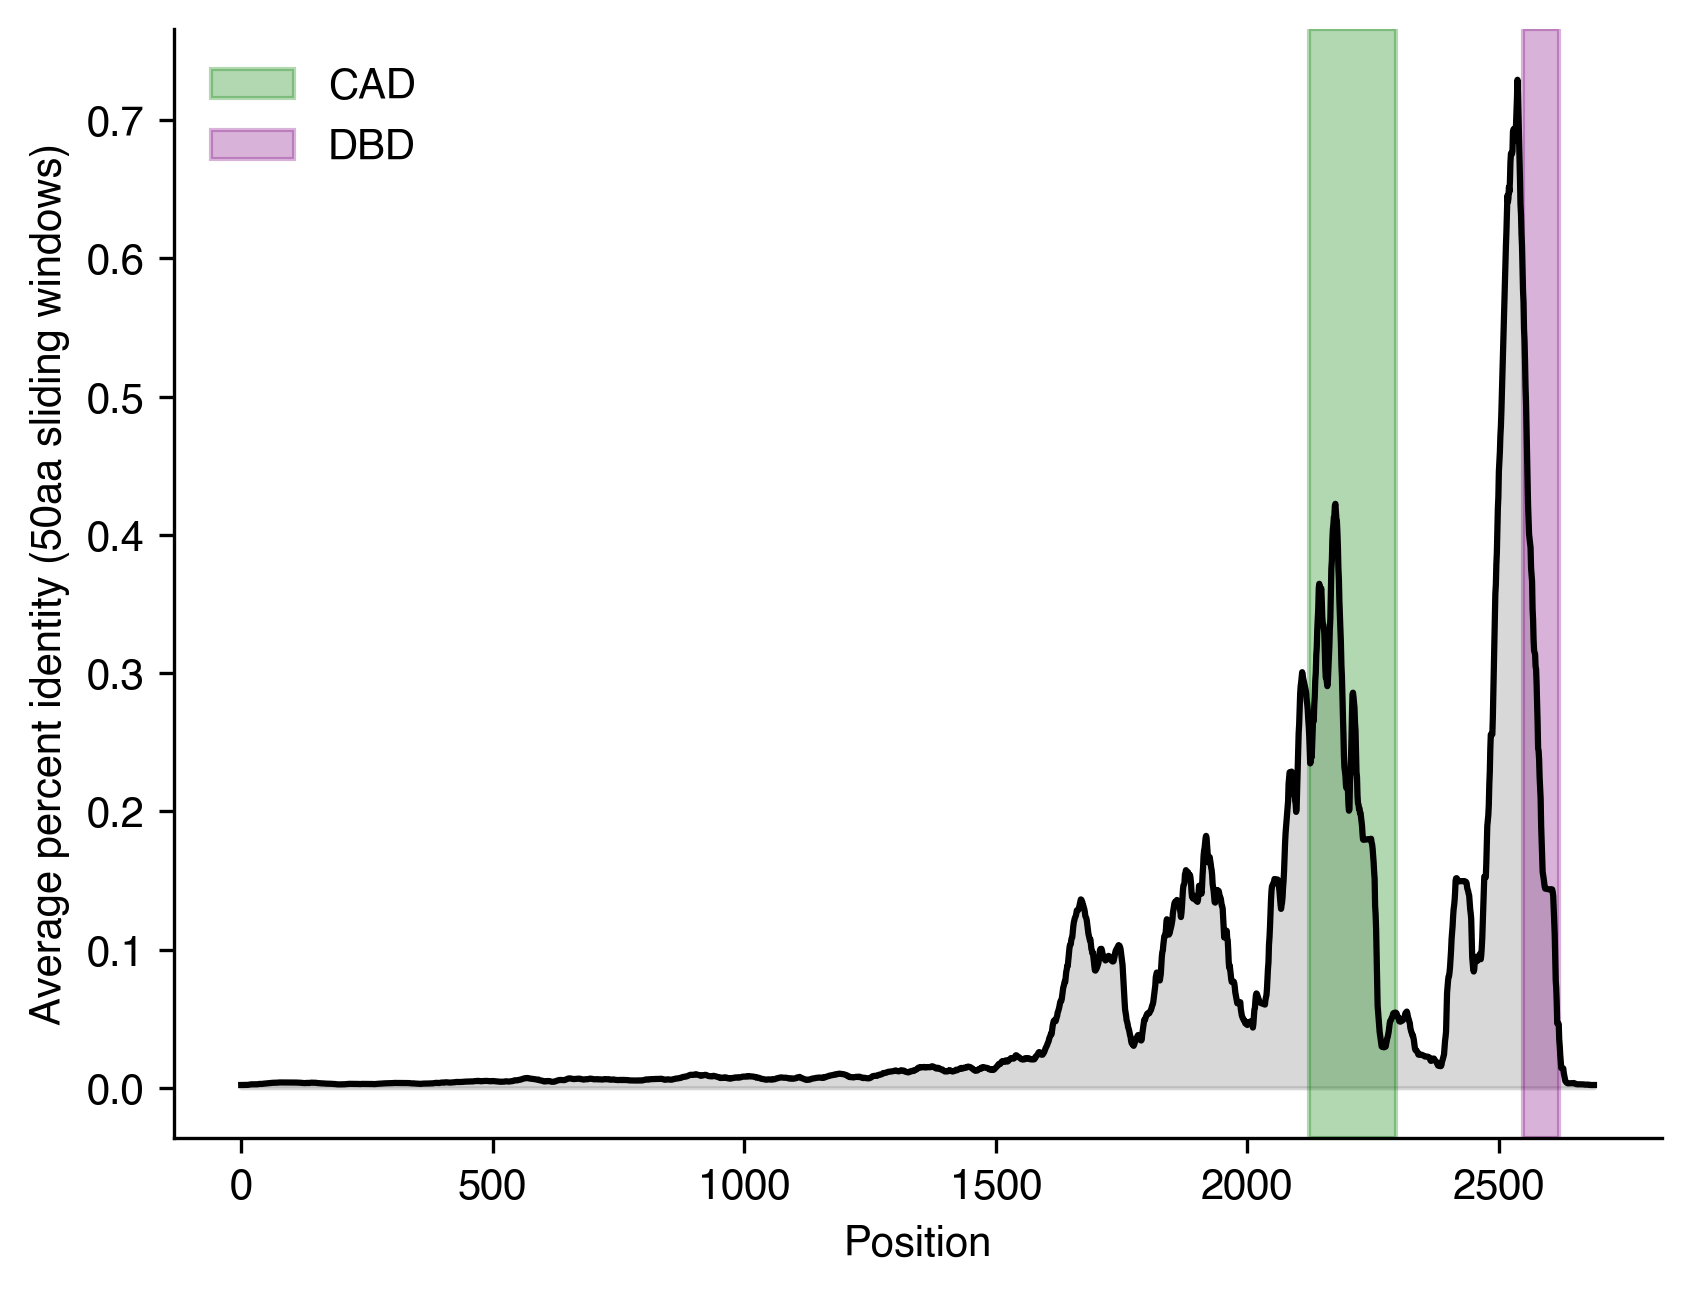

In [67]:
plt.plot(mean_vals, color='black')
plt.fill_between(range(0,len(mean_vals)), mean_vals, alpha=0.3, color='grey') 

sns.despine()
plt.xlabel("Position")
plt.ylabel("Average percent identity (50aa sliding windows)")

# # WLF motif
# plt.axvspan(2746, 2751, color="black", alpha=0.5)
# # Location of CAD --> Adding
# # DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK
plt.axvspan(2122, 2296, color="green", alpha=0.3, label="CAD")

# # Location of DBD --> Adding
# # SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENEVARLKKLVG
plt.axvspan(2548, 2620, color="purple", alpha=0.3, label="DBD")
plt.legend(frameon=False)


In [ ]:
def sliding_mean(x, window=15):
    """
    centered sliding mean; window should be odd.
    NaNs are ignored.
    """
    assert window % 2 == 1
    r = window // 2
    out = []
    for i in range(len(x)):
        lo, hi = max(0, i-r), min(len(x), i+r+1)
        vals = [v for v in x[lo:hi] if v == v]  # v==v filters NaN
        out.append(sum(vals)/len(vals) if vals else float('nan'))
    return out

In [ ]:
aa_conservation_no_gaps

array([1.        , 1.        , 0.96153846, ..., 1.        , 1.        ,
       0.5       ], shape=(5026,))

# DBD alignment

In [ ]:
full_alignment = AlignIO.read("../data/fasta_files/longest_gene_per_species_mafft.fasta", "fasta")

In [ ]:
columns_to_keep = []
num_sequences = len(full_alignment)

# Get columns with less than 90% gaps
for i, col_idx in enumerate(range(full_alignment.get_alignment_length())):
    column = full_alignment[:, col_idx]

    if i > 3050 and i < 3151:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in full_alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_DBD = MultipleSeqAlignment(filtered_records)

In [ ]:
viewer = RichAlignment(
    names=["" for record in filtered_alignment_DBD],
    sequences=[str(record.seq) for record in filtered_alignment_DBD], 
    styles=amino_acid_colors_black
)

# Use a console to display alignment on one line
console = rich.console.Console(force_terminal=False, width=150, record=True)
align = rich.align.Align(viewer, width=150)
console.print(align)

# # Save the stuff printed to the console as html format
# html_txt = console.export_html()

# # Write html to file
# with open("../figures/DBD.html", "w+") as f:
#     f.write(html_txt)

  1  -AS---G-------RHSSVAG--VG-S-----RKRDK-------------PLPPI---IVDDPTDTVAMKRARNTLAARKSRERKAQRFEELEERIRKL-                                          
     1  SPS---TSS-----KRSSMCG-----V-----RKRSQ-------------PLPPI---VVEDPSDTVAMKRARNTLAARKSRAKKAEKMEDMARTIEQL-                                          
     1  -KS---GSR-----KHSSVAG--VN-S-----RRRDK-------------PLPPI---VVDDPSDLIAVKRARNTAAARKSRMKKVERFELLERRIEEL-                                          
     1  -RS---GAR-----KHSSVAG--VN-S-----RRRDK-------------PLPPI---VVDDPSDLIAVKRARNTAAARKSRMKKMERFDALERQIEEL-                                          
     1  -PS---T-------RHSSVSG--VA-P-----RKRDK-------------PLPPI---IVEDPSDTIAMKRARNTLAARKSRERKAIRFEELEERIAKL-                                          
     1  -ST---SH------KHSASAG--VNAA-----RRREK-------------PLPPI---IVDDPSDIVAMKRARNTLAARKSRERKAMRVEELEEKIAKL-                                          
     1  -PS---G-------RHSSVSG--VG-S-----RRRDK-------------PLPPI---IVEDPSDTIAMKRARNTLAARKSRERKAQKLEELEEQIEKL-                                          
     1  -------NQ-----RRSQTSG--V---------RKRG----------

# Generate alignment

In [ ]:
# Create an alignment for the sequences around WxxLF
# This file was from Max
! mafft --auto ../data/fasta_files/IntegralAround_WxxLF_-50_+20_top69.fasta > ../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   60 / 69
done.

Progressive alignment ... 
STEP    21 /68 
Reallocating..done. *alloclen = 1142
STEP    68 /68 
done.
tbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

   60 / 69
Segment   1/  1    1- 128
STEP 003-062-0  identical.    identical.    accepted. identical.   
Converged.

done
dvtditr (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, 

In [ ]:
# Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# This is for the top 69 most active sequences

alignment = AlignIO.read("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta", "fasta")
gap_threshold = 0.9

columns_to_keep = []
num_sequences = len(alignment)

# Get columns with less than 90% gaps
for col_idx in range(alignment.get_alignment_length()):
    column = alignment[:, col_idx]
    num_gaps = column.count('-')
    gap_fraction = num_gaps / num_sequences

    if gap_fraction < gap_threshold:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_69 = MultipleSeqAlignment(filtered_records)

# Save the filtered alignment
AlignIO.write(filtered_alignment_69, "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta", "fasta")


1

In [ ]:
# Filter the alignment to remove gaps (remove positions that are more than 90% gaps)
# This is for all 138 unqiue cAD regions
alignment = AlignIO.read("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta", "fasta")

gap_threshold = 0.9

# Get columns with less than 90% gaps
columns_to_keep = []
num_sequences = len(alignment)

for col_idx in range(alignment.get_alignment_length()):
    column = alignment[:, col_idx]
    num_gaps = column.count('-')
    gap_fraction = num_gaps / num_sequences

    if gap_fraction < gap_threshold:
        columns_to_keep.append(col_idx)

# Write filtered alignment to list
filtered_records = []
for record in alignment:
    filtered_seq = ''.join(record.seq[i] for i in columns_to_keep)
    filtered_records.append(SeqRecord(Seq(filtered_seq), id=record.id, description=record.description))

# Turn list into Biopython alignment object
filtered_alignment_138 = MultipleSeqAlignment(filtered_records)

# Save the filtered alignment
AlignIO.write(filtered_alignment_138, "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta", "fasta")


1

In [ ]:
# Amino acid colors, where gaps are colored black (used in actual alignment)
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_black = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#000000"
}

# Make pretty alignment visualization

In [ ]:
viewer = RichAlignment(
    names=["" for record in filtered_alignment_69],
    sequences=[str(record.seq) for record in filtered_alignment_69], 
    styles=amino_acid_colors_black
)

In [ ]:
# Use a console to display alignment on one line
console = rich.console.Console(force_terminal=False, width=150, record=True)
align = rich.align.Align(viewer, width=150)
console.print(align)

# Save the stuff printed to the console as html format
html_txt = console.export_html()

# Write html to file
with open("../figures/alignment_69_filtered_new_colors.html", "w+") as f:
    f.write(html_txt)

 1  ------------------------------------------------------MFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  --SEEQEDDQFMTIPPLN---------EL--DSNVVDAFF------SSSTDSTPMFEFESLD----ESNDPKNWTSLFENDLPIITEDDVSLN                                                  
    1  SAP-------GLSAPDSSL--------AF--HSEVLDSVFS----NDEAVDHTPMFDELDFMLES---SNKEDWVSLFDANNEIDNSFNFTKV                                                  
    1  --PKDLFMD--ASAPPSASFTDLSTP-SF--ESPGY-----------FSQDTSPMFAT-DMELG----PGVEEWGSLFPSQDDFSLGLDTTAL                                                  
    1  ISPRDLMMD--TSVPPSGTFTDLSTP-SF--ESPGN-----------FSQNASPMFT--DMDL-----VGHEEWPSLFDGASDM-NAFDLANL                                                  
    1  --PKDLFMD--ASAPPSTSFTDLSTP-SF--ESPGY-----------FSQDTSPMFPT-DLELN----PGHEEWDSLFPPQDGFPVAFDSAAL                                                  
    1  ISPKDLMMD--ASVPPSGTFTDLSTP-SF--ESPGN-----------FSQNTSPMFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  -------MD--ASVPPSGTFTDLSTP-SF--ESPGN-----------FSQNTSPMFT--DLDV-----AGHEDWPSLFDHSSEPLNAFDLATL                                                  
    1  

# Make alignment conservation plot

In [ ]:
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

def make_alignment_conservation_plot(alignment_file, output_file, remove_gaps=False):
    """
    Function to make alignment conservation plots.
    
    alignment_file: Input alignment file
    output_file: Where to save the image
    remove_gaps: Whether or not to remove positions that are over 90% gaps 
    """
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,6))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors_white[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position", size=20)
    ax.set_ylabel("Percent of sequences", size=20)
    
    ax.spines[['right', 'top']].set_visible(False)

    custom_lines = []

    for color in list(amino_acid_colors_white.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors_white.keys()), bbox_to_anchor=(1.05, 0.95), fontsize=10)
    plt.tight_layout()
    plt.savefig(output_file)

In [ ]:
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#787878',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

def make_alignment_conservation_plot_top_aa(alignment_file, output_file, remove_gaps=False):
    """
    Function to make alignment conservation plots.
    
    alignment_file: Input alignment file
    output_file: Where to save the image
    remove_gaps: Whether or not to remove positions that are over 90% gaps 
    """
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]


    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1

    for i, aa_dict in enumerate(amino_acid_dicts):
        keys = list(aa_dict.values())
        keys.sort()
        # This part makes sure we only plot the top aas
        filter_val = keys[-2]
        new_dict = { k: v for k, v in aa_dict.items() if v >= filter_val}
        amino_acid_dicts[i] = new_dict

    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,6))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors_white[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position", size=20)
    ax.set_ylabel("Percent of sequences", size=20)
    
    ax.spines[['right', 'top']].set_visible(False)

    custom_lines = []

    for color in list(amino_acid_colors_white.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors_white.keys()), bbox_to_anchor=(1.05, 0.95), fontsize=10)
    plt.tight_layout()
    plt.savefig(output_file)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


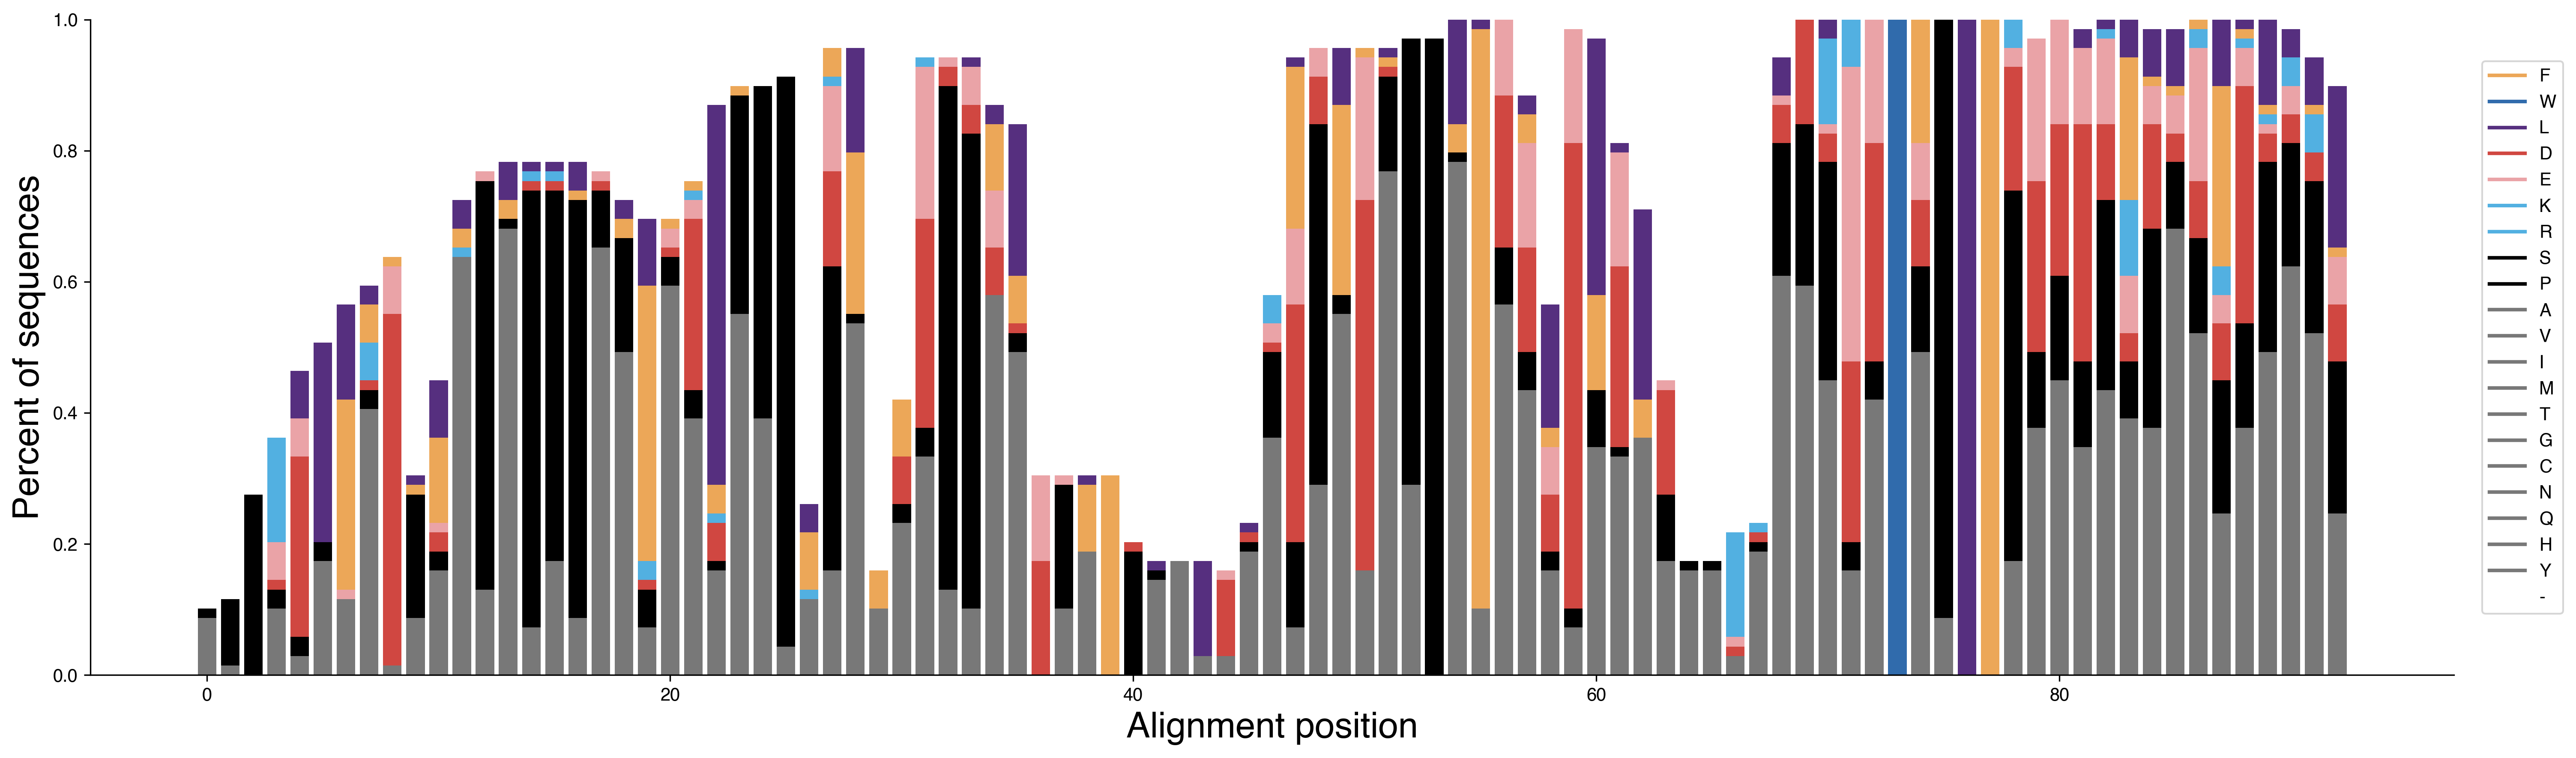

In [ ]:
make_alignment_conservation_plot("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta", "../figures/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_align_filtered.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


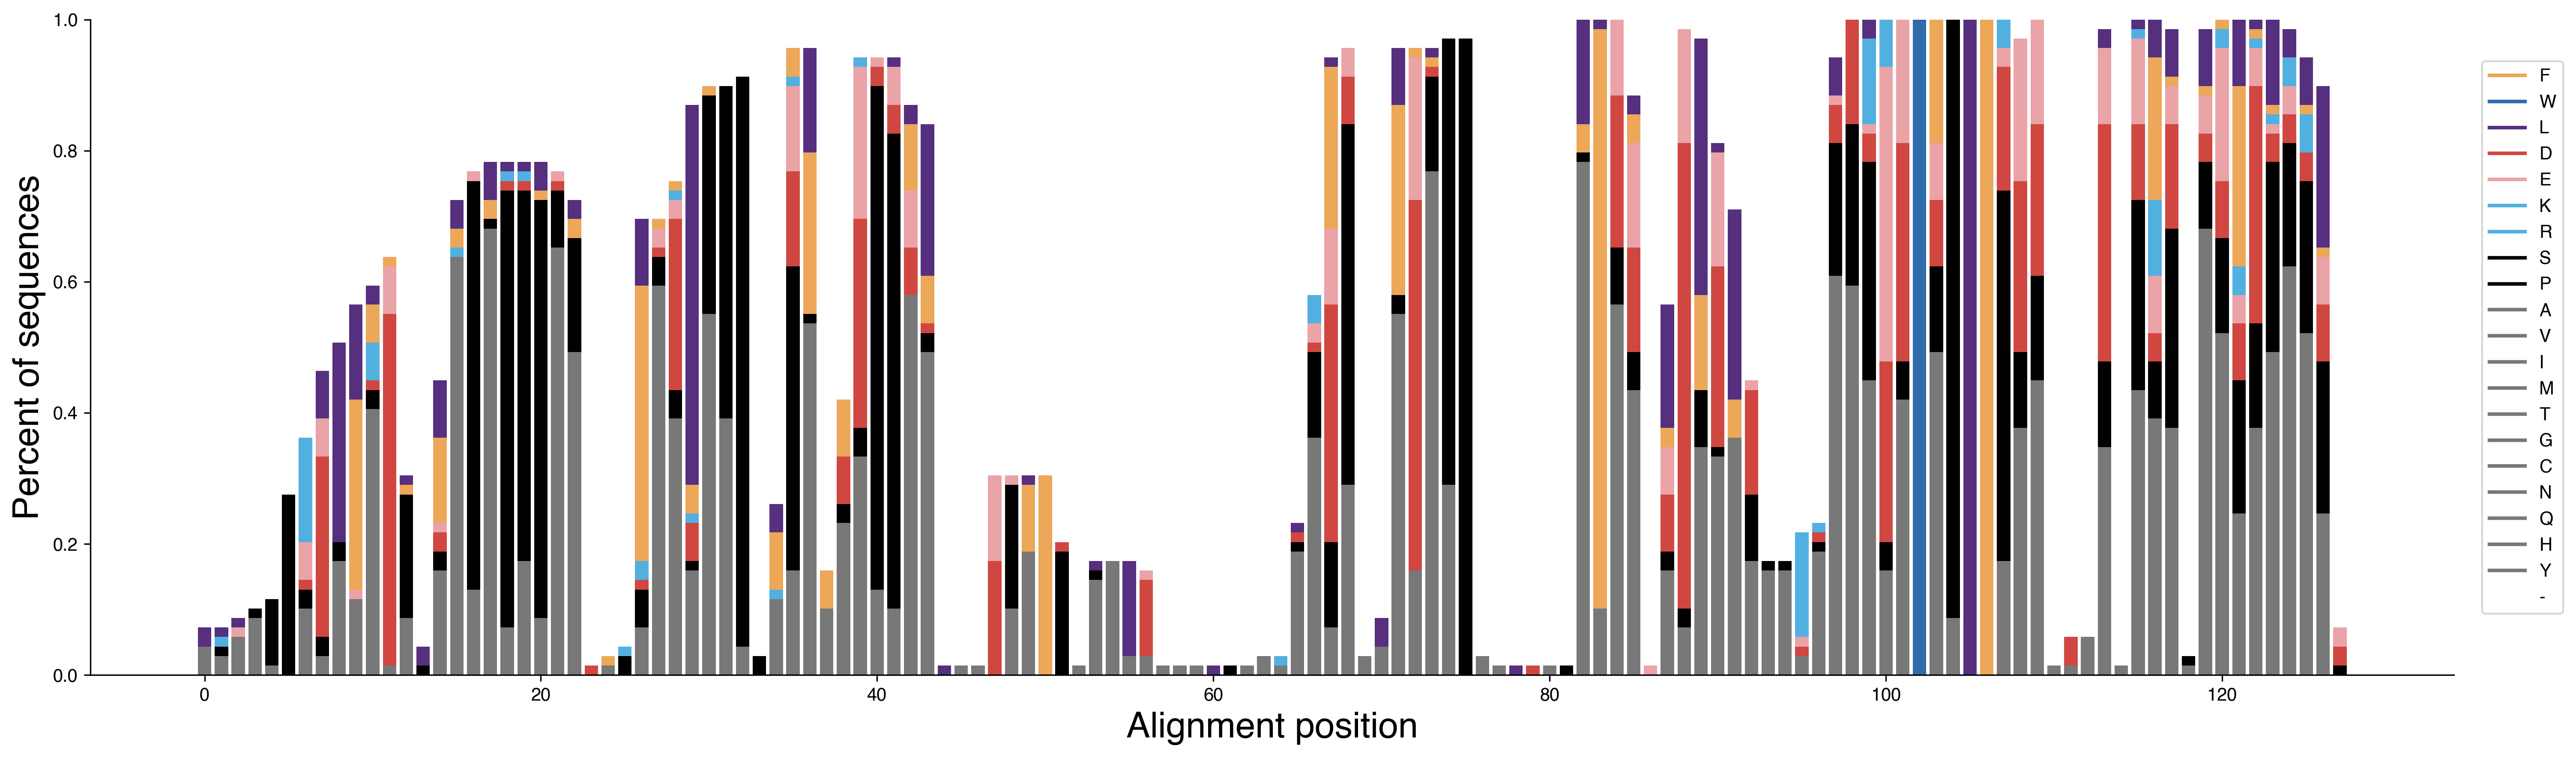

In [ ]:
make_alignment_conservation_plot("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta", "../figures/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_align.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


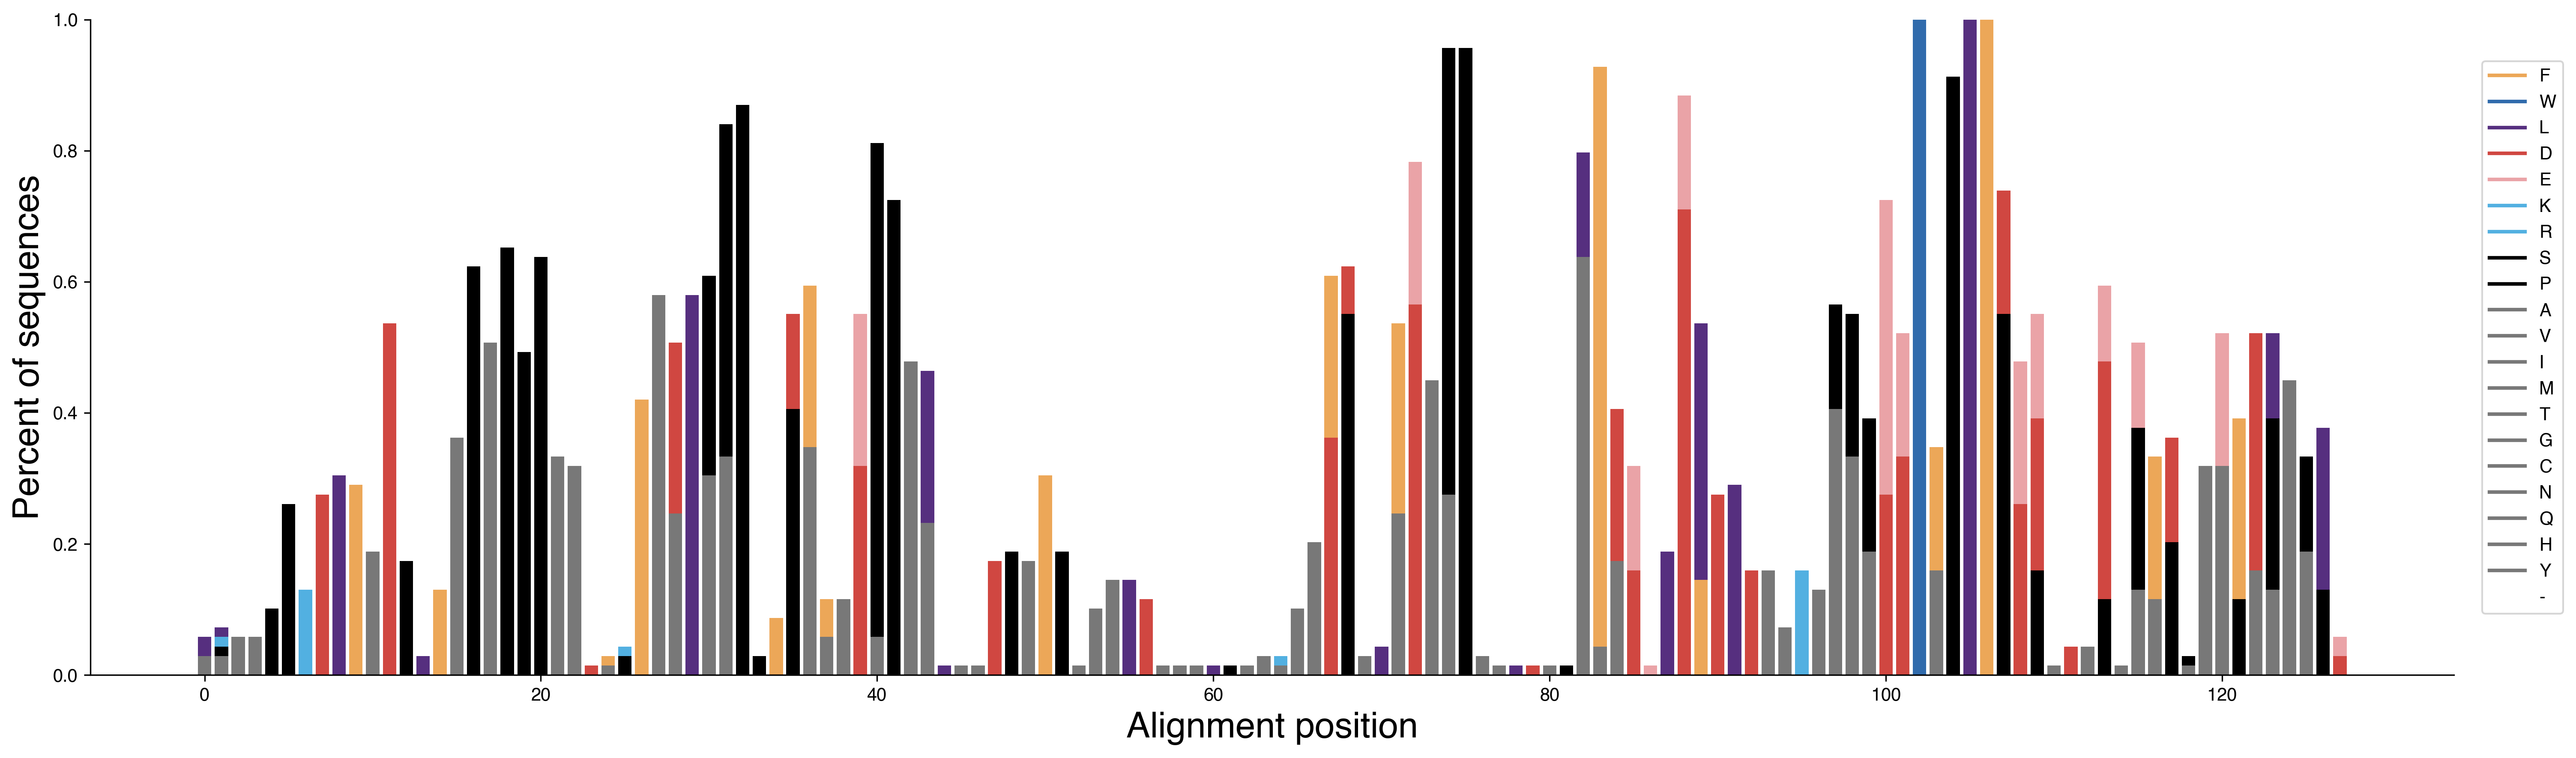

In [ ]:
make_alignment_conservation_plot_top_aa("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft.fasta", "../figures/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_align_top_aa.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


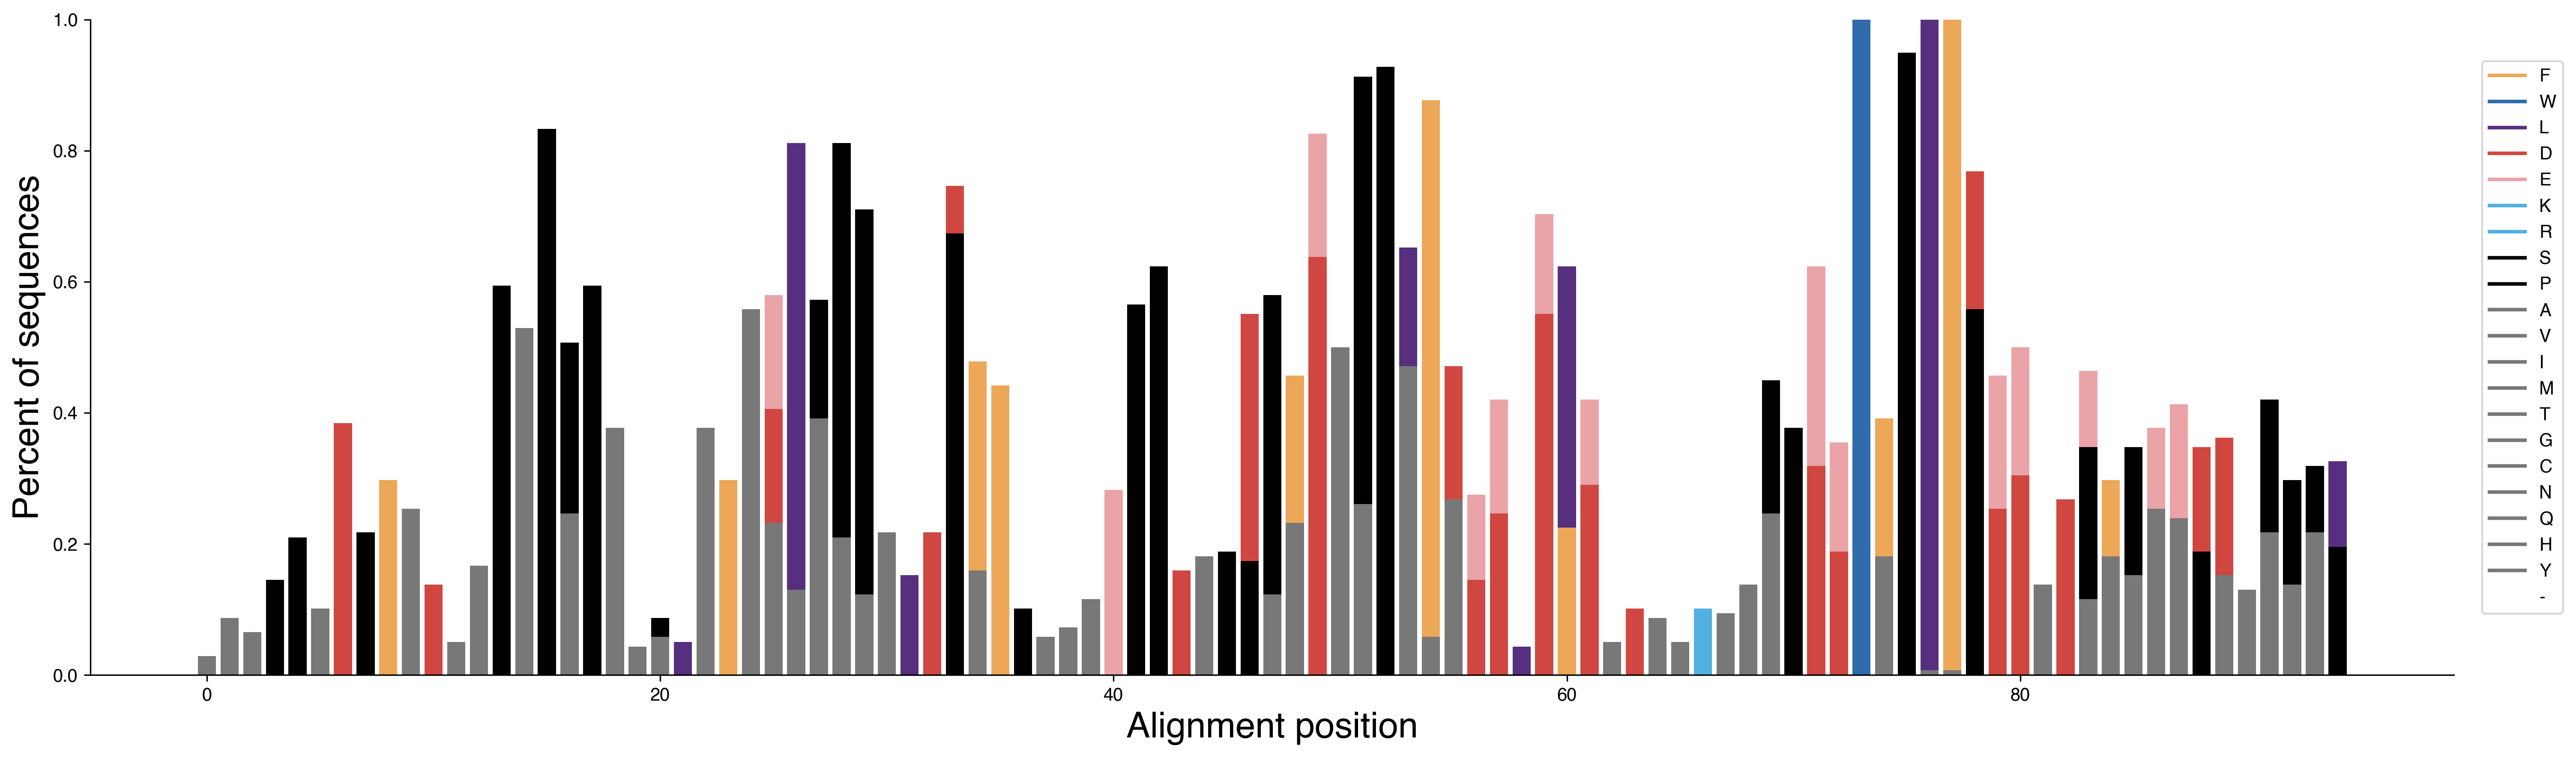

In [ ]:
make_alignment_conservation_plot_top_aa("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta", "../figures/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_align_filtered_top_aa.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


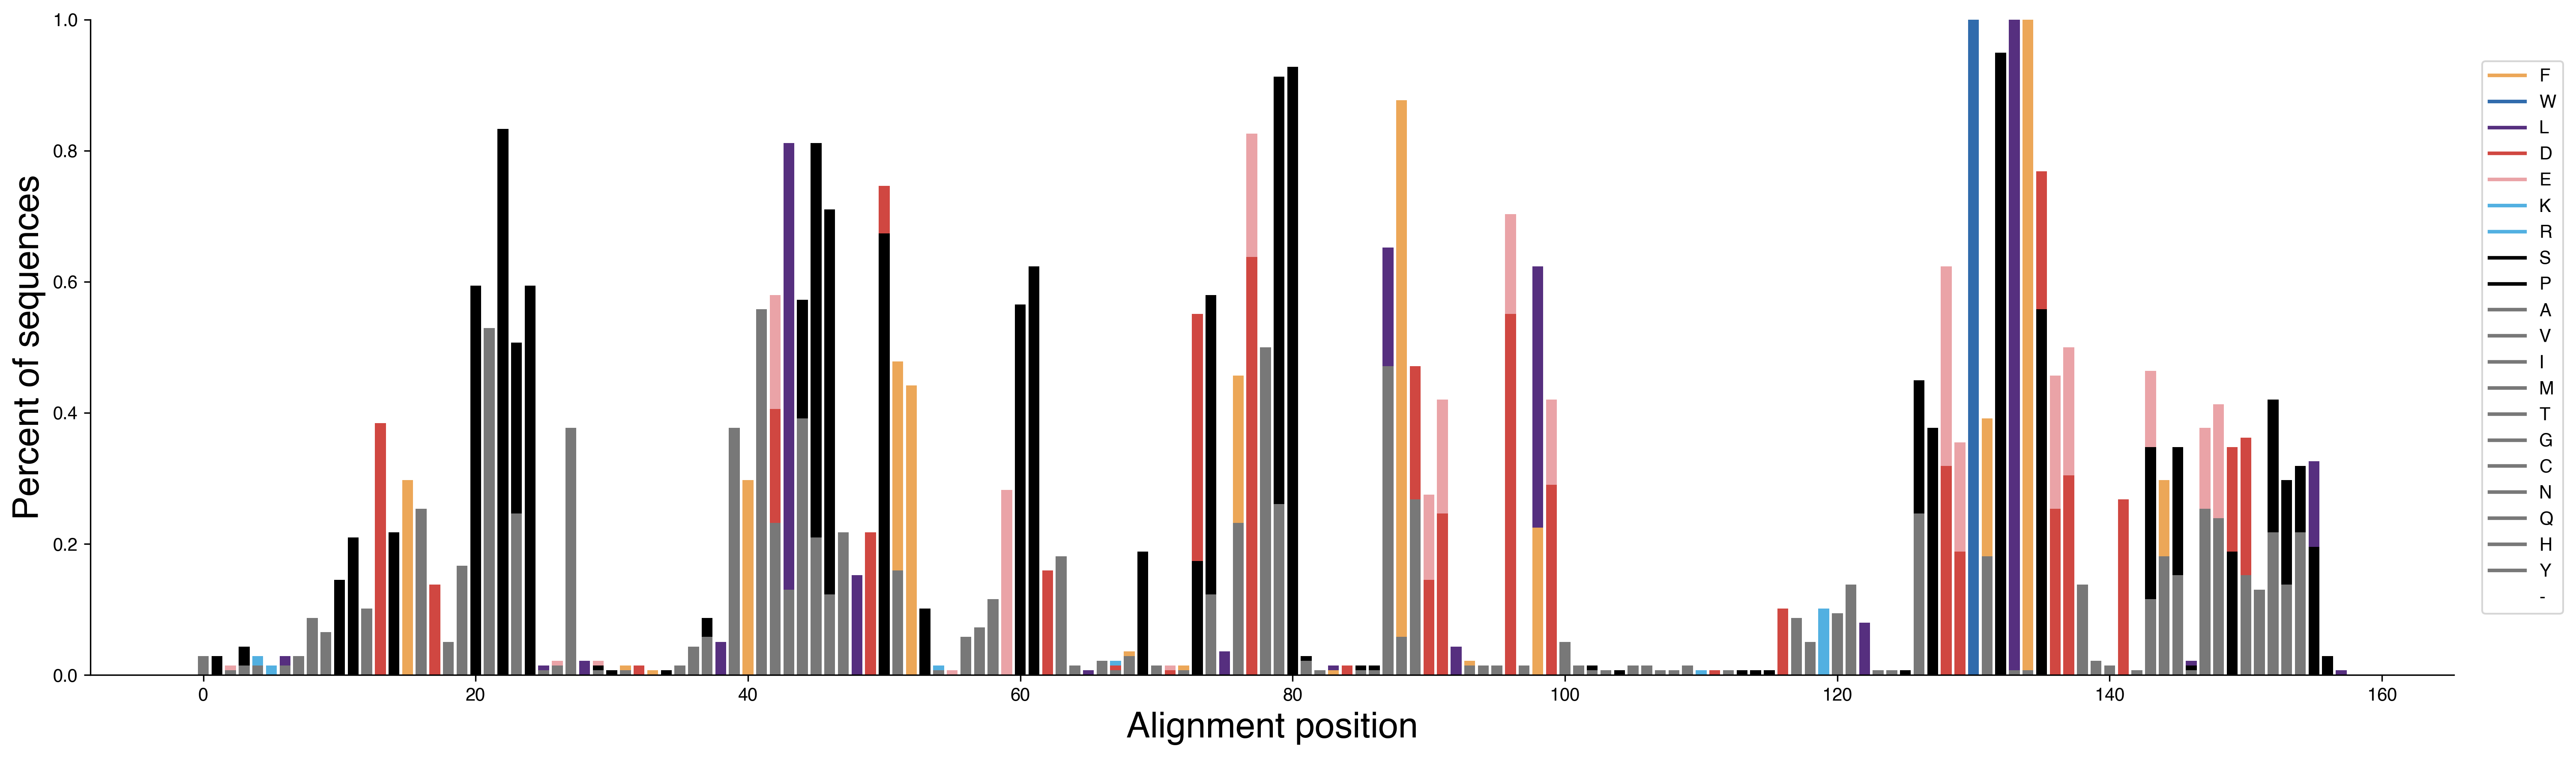

In [ ]:
make_alignment_conservation_plot_top_aa("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta", "../figures/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_align_top_aa.pdf")

# Make Logo

In [ ]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height))

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 10))
    logo.ax.set_xlabel('MSA Position')
    logo.ax.set_ylabel('Percent Identity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


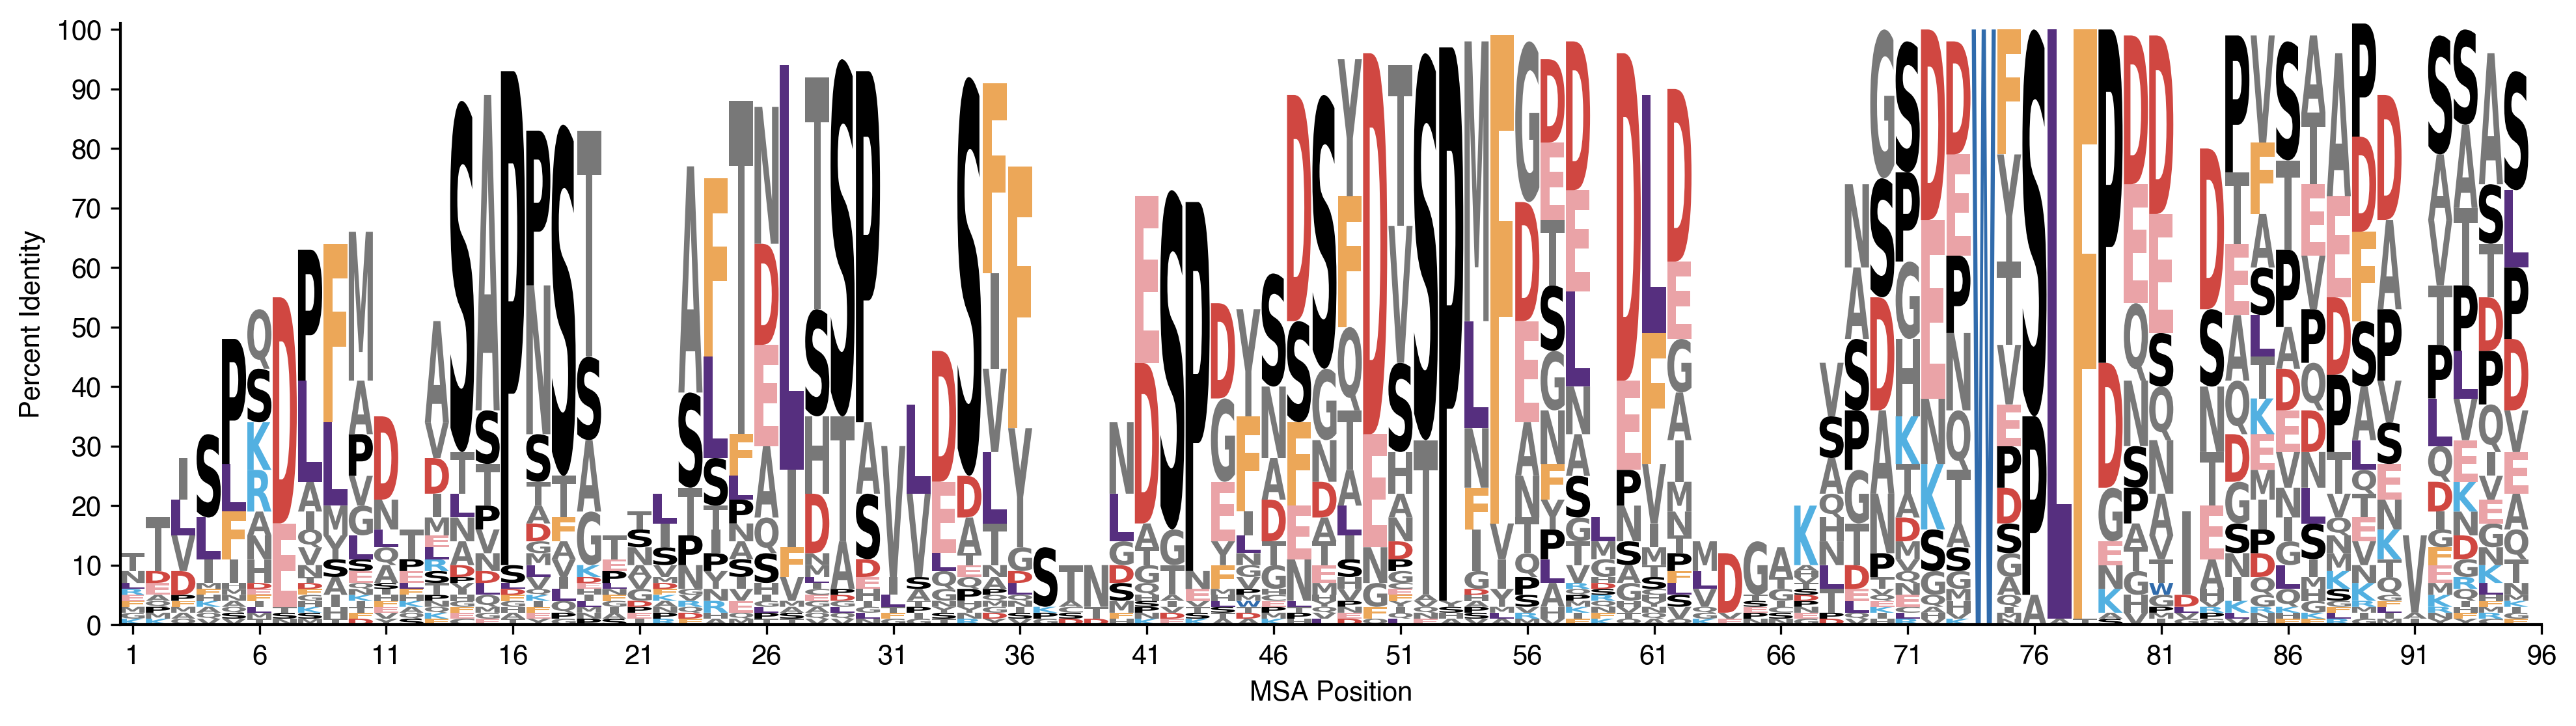

In [ ]:
# Function to make web logos
DrawLogo(
    alignment_file = "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft_filtered.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 96,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

plt.savefig("../figures/seq_logo_138.pdf")


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


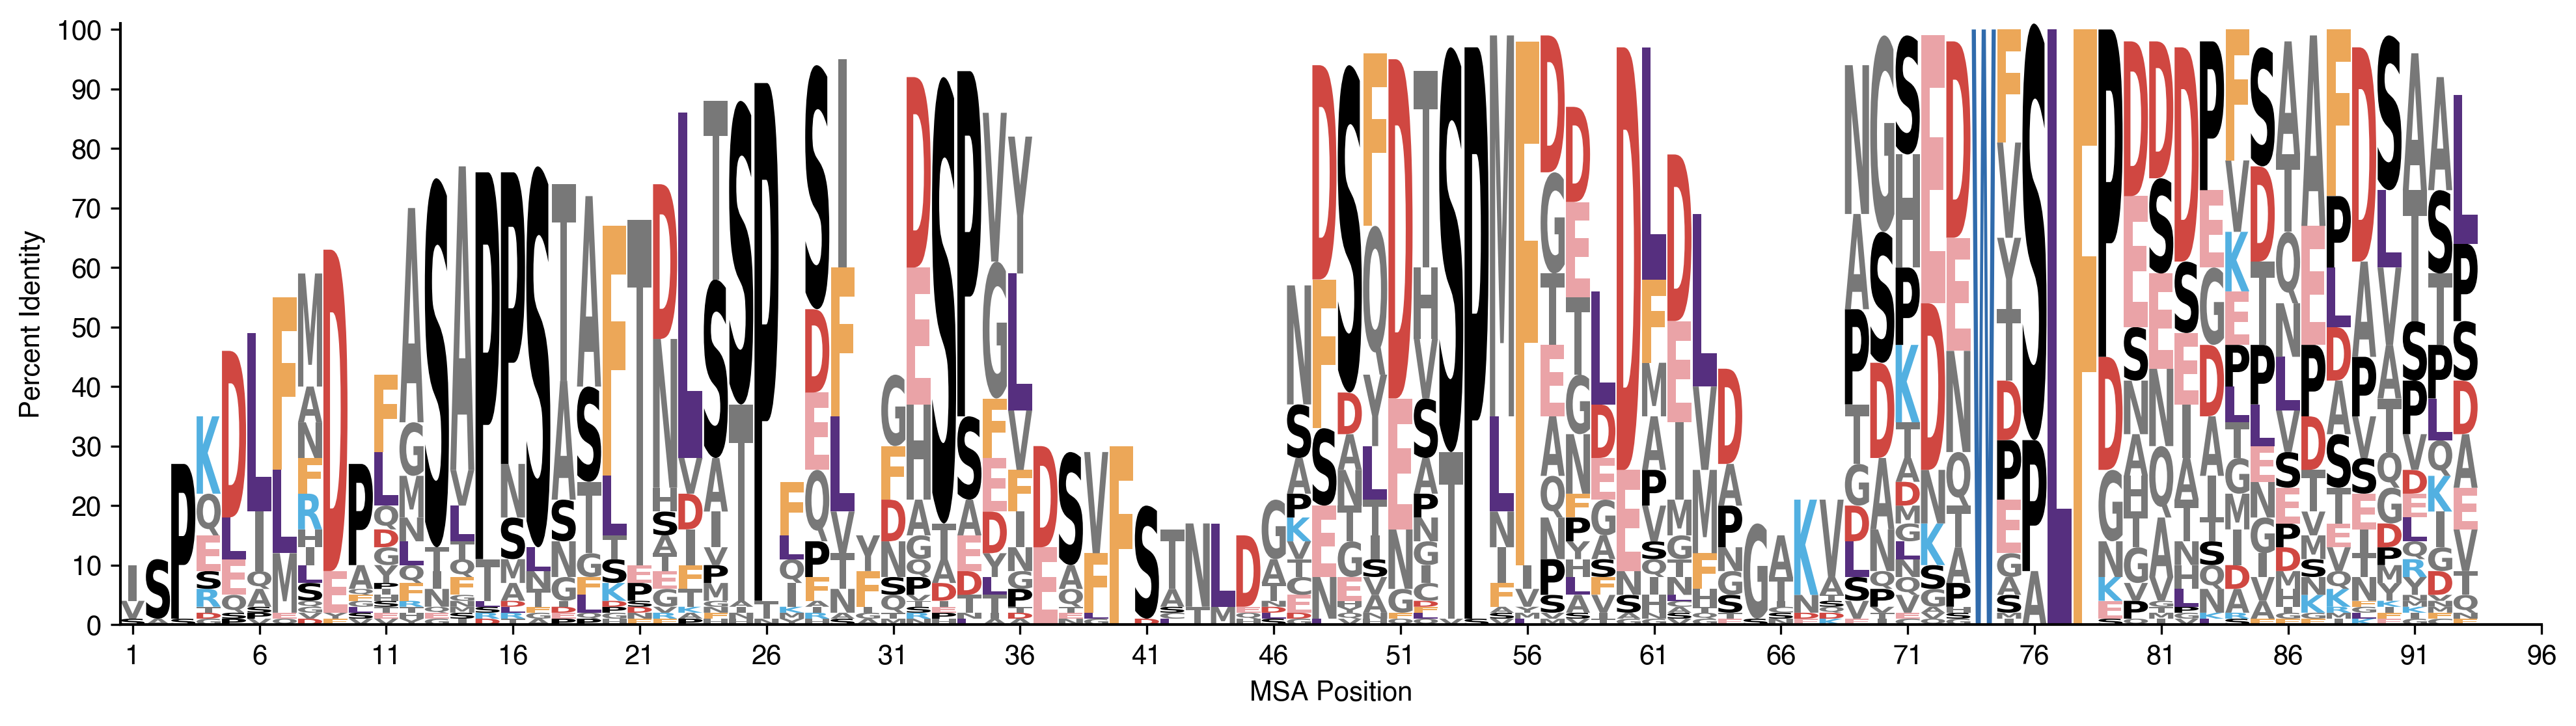

In [ ]:
# Function to make web logos
DrawLogo(
    alignment_file = "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top69_mafft_filtered.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 96,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 16,
    figure_height = 4
)

plt.savefig("../figures/seq_logo_69.pdf")